In [2]:


















# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_subfolders(base_dir, img_size):
    images = []
    labels = []
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif')  # Add any other extensions you need
    for subfolder in os.listdir(base_dir):
        subfolder_path = os.path.join(base_dir, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                file_path = os.path.join(subfolder_path, filename)
                if os.path.isfile(file_path) and file_path.lower().endswith(valid_extensions):
                    try:
                        img = load_img(file_path, target_size=img_size)
                        img_array = img_to_array(img) / 255.0
                        images.append(img_array)
                        labels.append(subfolder)
                    except Exception as e:
                        print(f"Error loading {file_path}: {e}")
    return np.array(images), np.array(labels)

# Define the directory path and parameters
base_dir = r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel'
img_size = (224, 224)

# Load images and labels
images, labels = load_images_from_subfolders(base_dir, img_size)


In [5]:
#show shape of data
print(images.shape)  


(4356, 224, 224, 3)


In [6]:
# This will print all the labels in the dataset
print(labels)  


['Bird-drop' 'Bird-drop' 'Bird-drop' ... 'Snow-Covered' 'Snow-Covered'
 'Snow-Covered']


In [7]:
# This will print the unique class labels
import numpy as np
unique_labels = np.unique(labels)
print(unique_labels)  

['Bird-drop' 'Clean' 'Dusty' 'Electrical-damage' 'Physical-Damage'
 'Snow-Covered']


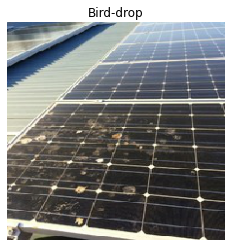

In [8]:
import matplotlib.pyplot as plt
# Function to display an image with its label
def show_image_with_label(img_array, label):
    plt.imshow(img_array)
    plt.title(label)
    plt.axis('off')  # Hide the axis
    plt.show()

# Display the first image and its label
show_image_with_label(images[0], labels[0])


In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load a pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def extract_features(img_array):
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array)
    return features.flatten()

# Extract features for all images
features = []
for img in images:
    features.append(extract_features(img))
features = np.array(features)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 

KeyboardInterrupt: 

In [ ]:
features.shape

(4356, 25088)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the labels
labels_encoded = le.fit_transform(labels)

# Print the classes to check the encoding
print("Class mappings:", dict(zip(le.classes_, le.transform(le.classes_))))


Class mappings: {'Bird-drop': 0, 'Clean': 1, 'Dusty': 2, 'Electrical-damage': 3, 'Physical-Damage': 4, 'Snow-Covered': 5}


In [ ]:
#deal with imbalance classes
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, labels_encoded)


In [ ]:
import collections
# Check the balance of the labels
print(collections.Counter(labels_resampled))


Counter({0: 1338, 1: 1338, 2: 1338, 3: 1338, 4: 1338, 5: 1338})


In [ ]:
#first model cnn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Assuming 'features_resampled' and 'labels_resampled' are your resampled data
input_shape = features_resampled.shape[1]

model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(np.unique(labels_resampled)), activation='softmax')  # Adjust the output layer according to your number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#ensure of dtye
features_resampled = features_resampled.astype(np.float32)
labels_resampled = labels_resampled.astype(np.int64)


In [ ]:
# Split the resampled data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

# Train the model
history=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.5717 - loss: 1.1913 - val_accuracy: 0.8867 - val_loss: 0.3795
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.9375 - loss: 0.2265 - val_accuracy: 0.9346 - val_loss: 0.2235
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9737 - loss: 0.0980 - val_accuracy: 0.9321 - val_loss: 0.2159
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9928 - loss: 0.0333 - val_accuracy: 0.9545 - val_loss: 0.1589
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.9989 - loss: 0.0134 - val_accuracy: 0.9496 - val_loss: 0.1956
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9985 - loss: 0.0125 - val_accuracy: 0.9570 - val_loss: 0.1632
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.9950 - loss: 0.0180 - val_accuracy: 0.9477 - val_loss: 0.1932
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.9930 - loss: 0.0235 - val_

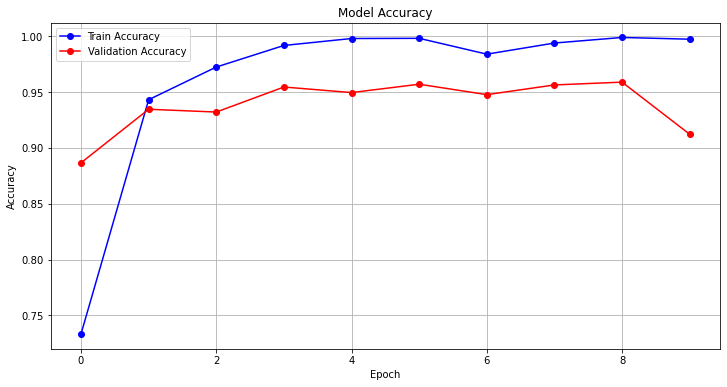

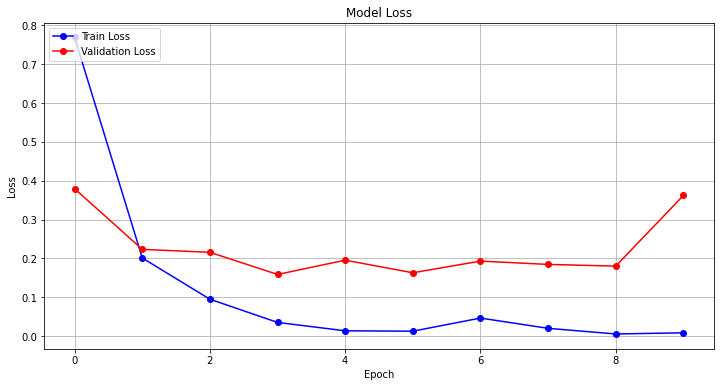

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(history.history['accuracy'], 'bo-', label='Train Accuracy')  # 'bo-' means blue color, round points, solid line
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')  # 'ro-' means red color, round points, solid line
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(history.history['loss'], 'bo-', label='Train Loss')  # 'bo-' means blue color, round points, solid line
plt.plot(history.history['val_loss'], 'ro-', label='Validation Loss')  # 'ro-' means red color, round points, solid line
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# regluaization by l2
from tensorflow.keras.regularizers import l2
# Get the input shape from the features
input_shape = features_resampled.shape[1]

# Define the model with L2 regularization
model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(len(np.unique(labels_resampled)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.6266 - loss: 2.4784 - val_accuracy: 0.7920 - val_loss: 1.1507
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - accuracy: 0.8490 - loss: 0.9727 - val_accuracy: 0.8755 - val_loss: 0.8829
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.8723 - loss: 0.8687 - val_accuracy: 0.8200 - val_loss: 1.0033
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - accuracy: 0.8841 - loss: 0.8177 - val_accuracy: 0.8836 - val_loss: 0.7592
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9073 - loss: 0.6967 - val_accuracy: 0.8786 - val_loss: 0.7793
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9111 - loss: 0.6838 - val_accuracy: 0.8537 - val_loss: 0.8404
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.9093 - loss: 0.6731 - val_accuracy: 0.8499 - val_loss: 0.8512
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.9181 - loss: 0.6509 - 

In [ ]:
# Training accuracy and loss
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

# Validation accuracy and loss
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']


In [ ]:
print(train_accuracy)

[0.7435378432273865, 0.8582996129989624, 0.8581438660621643, 0.8911554217338562, 0.893179714679718, 0.8925568461418152, 0.9014325737953186, 0.9081283211708069, 0.9184054732322693, 0.8944253921508789]


In [ ]:
import numpy as np
avg_train_loss = np.mean(train_loss)
avg_train_accuracy = np.mean(train_accuracy)*100
avg_val_loss = np.mean(val_loss)
avg_val_accuracy = np.mean(val_accuracy)*100
print(f'Training Loss: {avg_train_loss:.4f}') 
print(f'Training Accuracy: {avg_train_accuracy:.4f}')
print(f'Validation Loss: {avg_val_loss:.4f}')
print(f'Validation Accuracy: {avg_val_accuracy:.4f}')

Training Loss: 0.8486
Training Accuracy: 87.5927
Validation Loss: 0.8646
Validation Accuracy: 85.8904


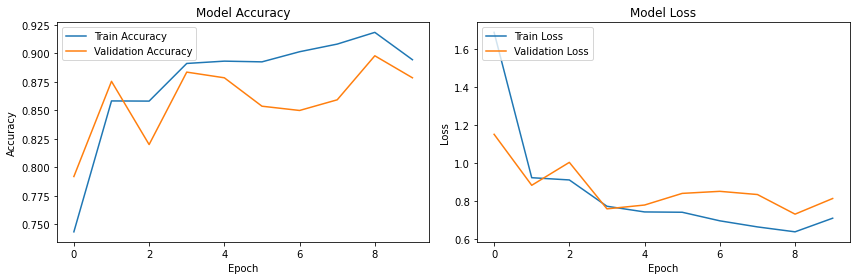

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


# saving model

In [ ]:
model.save(r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel.h5')


NameError: name 'model' is not defined

# test

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load and resize image function
def load_and_resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not load the image.")
        return None
    
    if image.size == 0:
        print("Error: The image has zero dimensions.")
        return None
    
    resized_image = cv2.resize(image, target_size)
    return resized_image

# Image preprocessing function
def preprocess_image(image):
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Path to your image
image_path = r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel\damage1.png'

# Load and resize image
processed_image = load_and_resize_image(image_path, target_size=(224, 224))

if processed_image is not None:
    print("Image processed successfully.")
    
    # Preprocess the image for the model
    processed_image = preprocess_image(processed_image)
    
    # Load your pre-trained model
    model = load_model(r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel.h5')
    
    # Ensure the input shape matches the model's expected input shape
    assert model.input_shape == (None, 224, 224, 3), "Input shape does not match the model's expected input shape."

    # Make a prediction
    prediction = model.predict(processed_image)

    # Example: If your model outputs probabilities for multiple classes
    predicted_class = np.argmax(prediction, axis=1)

    print(f'Predicted class: {predicted_class}')
else:
    print("Error: Image could not be processed.")


Image processed successfully.


AssertionError: Input shape does not match the model's expected input shape.

In [11]:
import cv2

def load_and_resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not load the image.")
        return None
    
    if image.size == 0:
        print("Error: The image has zero dimensions.")
        return None
    
    resized_image = cv2.resize(image, target_size)
    return resized_image

image_path = r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel\damage1.png'
processed_image = load_and_resize_image(image_path, target_size=(224, 224))

if processed_image is not None:
    print("Image processed successfully.")
else:
    print("Error: Image could not be processed.")


Image processed successfully.


In [12]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model

# Load your pre-trained model
model = load_model(r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel.h5')

# Function to preprocess image
def preprocess_image(image_path, target_size=(224, 224)):
    # Load image
    image = cv2.imread(image_path)
    # Ensure the image is loaded correctly
    if image is None:
        raise ValueError("Error: Could not load the image.")
    
    # Resize image to target size
    image = cv2.resize(image, target_size)
    # Normalize pixel values
    image = image / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

# Example usage
image_path = r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel\damage1.png'
processed_image = preprocess_image(image_path)

# Ensure the input shape matches the model's expected input shape
assert model.input_shape == (None, 224, 224, 3), "Input shape does not match the model's expected input shape."

# Make a prediction
prediction = model.predict(processed_image)

# Example: If your model outputs probabilities for multiple classes
predicted_class = np.argmax(prediction, axis=1)

print(f'Predicted class: {predicted_class}')


AssertionError: Input shape does not match the model's expected input shape.

In [ ]:
print(model.input_shape)


NameError: name 'model' is not defined

# deployment

In [14]:
! pip install jinja2==3.0.3 --force-reinstall


  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Ayman\\anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [18]:
from markupsafe import escape


In [ ]:
from flask import Flask, request, jsonify
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from markupsafe import escape  # Correct import

app = Flask(__name__)

# Load your pre-trained model
model = load_model(r'C:\Users\Ayman\Desktop\graduation\Faulty_solar_panel.h5')

def preprocess_image(image):
    # Normalize pixel values
    image = image / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    return image

def load_and_resize_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not load the image.")
        return None
    
    if image.size == 0:
        print("Error: The image has zero dimensions.")
        return None
    
    resized_image = cv2.resize(image, target_size)
    return resized_image

def predict(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    
    # Ensure the input shape matches the model's expected input shape
    assert model.input_shape == (None, 224, 224, 3), "Input shape does not match the model's expected input shape."
    
    # Make a prediction
    prediction = model.predict(processed_image)
    
    # Example: If your model outputs probabilities for multiple classes
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class

@app.route('/predict', methods=['POST'])
def predict_endpoint():
    if 'file' not in request.files:
        return jsonify({"error": "No file part"}), 400

    file = request.files['file']

    if file.filename == '':
        return jsonify({"error": "No selected file"}), 400

    # Save the uploaded file to a temporary location
    file_path = 'temp_image.png'
    file.save(file_path)
    
    # Load and resize the image
    image = load_and_resize_image(file_path, target_size=(224, 224))

    if image is not None:
        # Predict the class of the image
        predicted_class = predict(image)
        return jsonify({"prediction": int(predicted_class[0])})
    else:
        return jsonify({"error": "Image could not be processed."}), 400                             
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1